In [10]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

In [11]:
frictions = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [12]:
results = []
folder = 'friction_results'
for json_file in os.listdir(folder):
    _, friction_idx, rotation = json_file.split('.')[0].split('_')
    json_file = os.path.join(folder,json_file)
    with open(json_file, "r") as file:
        data = json.load(file)
    angular_error = sum(data.values()) / len(data.values())
    results.append([frictions[int(friction_idx)] , rotation, angular_error])
results

[[0.1, "F'", 0.778573944611937],
 [1, 'U', 0.0057597295487805625],
 [0.6, 'R', 0.040750586081278226],
 [0.4, "R'", 0.03574587384738762],
 [0.2, 'R', 0.017674505476794892],
 [0.4, 'F', 0.01595519396447967],
 [1, "F'", 0.017037482969204154],
 [0.6, "U'", 0.013036075111275818],
 [0.9, "F'", 0.015524469325248435],
 [0.5, "U'", 0.013381565749448076],
 [0.2, "F'", 0.7793621514194977],
 [0.6, 'F', 0.015667175189622146],
 [0.3, "R'", 0.021931044558945224],
 [0.4, 'R', 0.03977514522783265],
 [0.8, 'U', 0.005086922987479309],
 [0.2, 'F', 0.012526604866786079],
 [0.7, "F'", 0.014725672077738063],
 [0.3, "U'", 0.7809178809028765],
 [0.8, 'R', 0.03494820286000386],
 [0.4, 'U', 0.005616580984320369],
 [1, 'F', 0.1736467729389851],
 [0.5, "R'", 0.04091325027546902],
 [0.8, 'F', 0.03362904448554385],
 [0.2, 'U', 0.007050170449469101],
 [0.6, 'U', 0.005307409824804044],
 [1, 'R', 0.08938293370674043],
 [0.6, "R'", 0.042978127398730866],
 [0.8, "F'", 0.015879346286541876],
 [0.4, "U'", 0.018531273536041

In [13]:
sorted(results, key = lambda x : x[2])

[[0.7, 'U', 0.0044305832555318145],
 [0.8, 'U', 0.005086922987479309],
 [0.6, 'U', 0.005307409824804044],
 [0.3, 'U', 0.0053080149857965735],
 [0.4, 'U', 0.005616580984320369],
 [1, 'U', 0.0057597295487805625],
 [0.2, 'U', 0.007050170449469101],
 [0.9, 'U', 0.007591852416191708],
 [0.5, 'U', 0.008690059735719168],
 [0.1, 'F', 0.011714340707839721],
 [0.3, 'F', 0.011723642899020814],
 [0.2, 'F', 0.012526604866786079],
 [0.6, "U'", 0.013036075111275818],
 [0.5, "U'", 0.013381565749448076],
 [0.7, "U'", 0.014298749131544193],
 [0.7, "F'", 0.014725672077738063],
 [1, "U'", 0.0152789300139377],
 [0.9, "F'", 0.015524469325248435],
 [0.6, 'F', 0.015667175189622146],
 [0.8, "F'", 0.015879346286541876],
 [0.6, "F'", 0.01592857181355757],
 [0.4, 'F', 0.01595519396447967],
 [0.8, "U'", 0.01601914643259244],
 [0.5, 'F', 0.01612597852940455],
 [0.9, "U'", 0.016758674686120727],
 [1, "F'", 0.017037482969204154],
 [0.2, 'R', 0.017674505476794892],
 [0.4, "U'", 0.018531273536041143],
 [0.5, "F'", 0.02

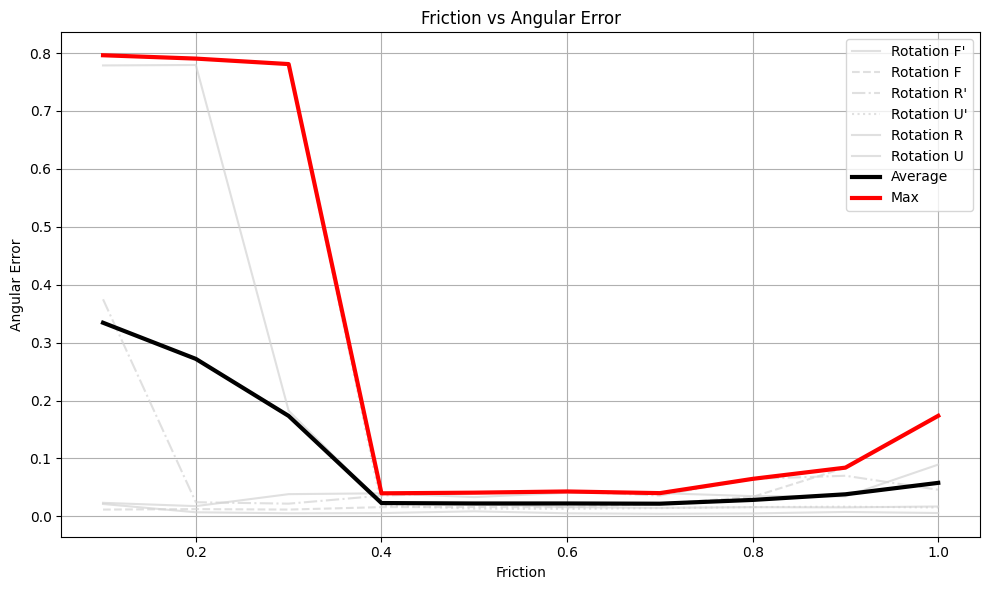

In [23]:
# Convert results into a DataFrame for easier manipulation
df = pd.DataFrame(results, columns=["Friction", "Rotation", "Angular Error"])
df = df.sort_values(by="Friction", ascending=True)

# Get a list of unique rotations
rotations = df['Rotation'].unique()

# Prepare to plot
plt.figure(figsize=(10, 6))

# Different line styles and colors for each rotation
line_styles = ['-', '--', '-.', ':', '-']

# Plot for each rotation with a lighter line and different styles/colors
for i, rotation in enumerate(rotations):
    rotation_data = df[df['Rotation'] == rotation]
    plt.plot(rotation_data['Friction'], rotation_data['Angular Error'], 
             label=f'Rotation {rotation}', color = 'lightgrey', linestyle=line_styles[i % len(line_styles)], alpha=0.7)

# Calculate and plot average and max over rotations with bold lines
average_df = df.groupby('Friction')['Angular Error'].mean()
max_df = df.groupby('Friction')['Angular Error'].max()

plt.plot(average_df.index, average_df, label='Average', color='black', linestyle='-', linewidth=3)  # Bold average line
plt.plot(max_df.index, max_df, label='Max', color='red', linestyle='-', linewidth=3)  # Bold max line

# Customize plot
plt.xlabel('Friction')
plt.ylabel('Angular Error')
plt.title('Friction vs Angular Error')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [24]:
max_df

Friction
0.1    0.796147
0.2    0.790387
0.3    0.780918
0.4    0.039775
0.5    0.040913
0.6    0.042978
0.7    0.040104
0.8    0.064748
0.9    0.084123
1.0    0.173647
Name: Angular Error, dtype: float64